

# KNN Classification and Imputation: Cell Phone Churn Data


In this lab you will practice using KNN for classification (and a little bit for regression as well).

The dataset is one on "churn" in cell phone plans. It has information on the usage of the phones by different account holders and whether or not they churned or not.

Our goal is to predict whether a user will churn or not based on the other features.

We will also be using the KNN model to **impute** missing data. There are a couple of columns in the dataset with missing values, and we can build KNN models to predict what those missing values will most likely be. This is a more advanced imputation method than just filling in the mean or median.

In [166]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


from sklearn.neighbors import KNeighborsClassifier

### 1. Load the cell phone "churn" data containing some missing values.

In [167]:
churn = pd.read_csv('../data/churn_missing.csv')

In [168]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state             3333 non-null object
account_length    3333 non-null int64
area_code         3333 non-null int64
intl_plan         3333 non-null object
vmail_plan        2933 non-null object
vmail_message     2933 non-null float64
day_mins          3333 non-null float64
day_calls         3333 non-null int64
day_charge        3333 non-null float64
eve_mins          3333 non-null float64
eve_calls         3333 non-null int64
eve_charge        3333 non-null float64
night_mins        3333 non-null float64
night_calls       3333 non-null int64
night_charge      3333 non-null float64
intl_mins         3333 non-null float64
intl_calls        3333 non-null int64
intl_charge       3333 non-null float64
custserv_calls    3333 non-null int64
churn             3333 non-null bool
dtypes: bool(1), float64(9), int64(7), object(3)
memory usage: 498.1+ KB


### 2. Examine the data. What columns have missing values?

In [169]:
churn.shape

(3333, 20)

In [170]:
churn.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25.0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26.0,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0.0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0.0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0.0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [171]:
churn.columns

Index(['state', 'account_length', 'area_code', 'intl_plan', 'vmail_plan',
       'vmail_message', 'day_mins', 'day_calls', 'day_charge', 'eve_mins',
       'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge',
       'intl_mins', 'intl_calls', 'intl_charge', 'custserv_calls', 'churn'],
      dtype='object')

In [172]:
churn.isnull().sum(axis = 0)
# vmail_plan and vmail_message are columns with null values

state               0
account_length      0
area_code           0
intl_plan           0
vmail_plan        400
vmail_message     400
day_mins            0
day_calls           0
day_charge          0
eve_mins            0
eve_calls           0
eve_charge          0
night_mins          0
night_calls         0
night_charge        0
intl_mins           0
intl_calls          0
intl_charge         0
custserv_calls      0
churn               0
dtype: int64

### 3. Convert the `vmail_plan` and `intl_plan` colums to binary integer columns.

Make sure that if a value is missing that you don't fill it in with a new value! Preserve the missing values.

In [173]:
churn.vmail_plan.unique()

array(['yes', 'no', nan], dtype=object)

In [174]:
churn['vmail_plan'].replace({'yes':1, 'no':0},inplace=True)
churn.vmail_plan.unique()

array([ 1.,  0., nan])

In [175]:
churn.intl_plan.unique()

array(['no', 'yes'], dtype=object)

In [176]:
churn['intl_plan'].replace({'yes':1, 'no':0},inplace=True)
churn.intl_plan.unique()

array([0, 1])

### 4. Create dummy coded columns for state and concatenate it to the churn dataset.

> **Remember:** You will need to leave out one of the state dummy coded columns to serve as the "reference" column since we will be using these for modeling.

In [177]:
emb_dums = pd.get_dummies(churn.state, prefix="emb", drop_first=True)

#Look at emb_dums
emb_dums.head()


,emb_AL,emb_AR,emb_AZ,emb_CA,emb_CO,emb_CT,emb_DC,emb_DE,emb_FL,emb_GA,...,emb_SD,emb_TN,emb_TX,emb_UT,emb_VA,emb_VT,emb_WA,emb_WI,emb_WV,emb_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
#Drop state column
churn = churn.drop("state", axis= 1)

#Concatenate the titanic and emb_dums dataframes and overwrite titanic variable
churn = pd.concat([churn, emb_dums], axis=1)

#3. View new concatenated dataframe
churn.head()

,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,...,emb_SD,emb_TN,emb_TX,emb_UT,emb_VA,emb_VT,emb_WA,emb_WI,emb_WV,emb_WY
0,128,415,0,1.0,25.0,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1.0,26.0,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0.0,0.0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0.0,0.0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0.0,0.0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [179]:
churn.shape

(3333, 69)

### 5. Create a version of the churn data that has no missing values.



In [180]:
churn.groupby('vmail_plan').count()


,account_length,area_code,intl_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,...,emb_SD,emb_TN,emb_TX,emb_UT,emb_VA,emb_VT,emb_WA,emb_WI,emb_WV,emb_WY
vmail_plan,,,,,,,,,,,,,,,,,,,,,
0.0,2130,2130,2130,2130,2130,2130,2130,2130,2130,2130,...,2130,2130,2130,2130,2130,2130,2130,2130,2130,2130
1.0,803,803,803,803,803,803,803,803,803,803,...,803,803,803,803,803,803,803,803,803,803


In [181]:
#Use 0 to replacce nan because there are more accounts with no int_plan (2130 vs 803)
churn['vmail_plan'].fillna(0, inplace=True)
churn.vmail_plan.unique()


array([1., 0.])

In [182]:
churn.mean().loc['vmail_message']

8.022502557108762

In [183]:
churn['vmail_message'].fillna(8, inplace=True)


In [187]:
churn.isnull().sum(axis = 0)

account_length    0
area_code         0
intl_plan         0
vmail_plan        0
vmail_message     0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
intl_mins         0
intl_calls        0
intl_charge       0
custserv_calls    0
churn             0
emb_AL            0
emb_AR            0
emb_AZ            0
emb_CA            0
emb_CO            0
emb_CT            0
emb_DC            0
emb_DE            0
emb_FL            0
emb_GA            0
emb_HI            0
                 ..
emb_ME            0
emb_MI            0
emb_MN            0
emb_MO            0
emb_MS            0
emb_MT            0
emb_NC            0
emb_ND            0
emb_NE            0
emb_NH            0
emb_NJ            0
emb_NM            0
emb_NV            0
emb_NY            0
emb_OH            0
emb_OK            0
emb_OR            0
emb_PA            0
emb_RI            0


### 6. Create a target vector and predictor matrix.

- Target should be the `churn` column.
- Predictor matrix should be all columns except `area_code`, `state`, and `churn`.

In [188]:
churn.churn.unique()

array([False,  True])

In [189]:
X = churn.drop(['area_code', 'churn'], axis = 1)
y = churn.churn

### 7. Calculate the null accuracy for `churn`.

In [190]:
churn.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

### 8. Cross-validate a KNN model predicting `churn`. 

- Number of neighbors should be 5.
- Make sure to standardize the predictor matrix.
- Set cross-validation folds to 10.

Report the mean cross-validated accuracy.

In [192]:
#Imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Intialize scalers
ss = StandardScaler()
X_ss = ss.fit_transform(X)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [193]:
X_ss = pd.DataFrame(X_ss, columns=X.columns)
X_ss.head()

,account_length,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,...,emb_SD,emb_TN,emb_TX,emb_UT,emb_VA,emb_VT,emb_WA,emb_WI,emb_WV,emb_WY
0,0.676489,-0.327580,1.775017,1.325549,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
1,0.149065,-0.327580,1.775017,1.403614,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
2,0.902529,-0.327580,-0.563375,-0.626061,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
3,-0.428590,3.052685,-0.563375,-0.626061,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
4,-0.654629,3.052685,-0.563375,-0.626061,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781


In [194]:
from sklearn.model_selection import train_test_split, cross_val_score
model = KNeighborsClassifier(5)
cv_score = cross_val_score(model, X_ss, y, cv =10 , scoring="accuracy").mean()
cv_score

0.8568898239556922

### 9. Iterate from k=1 to k=49 (only odd k) and cross-validate the accuracy of the model for each.

Plot the cross-validated mean accuracy for each score. What is the best accuracy?

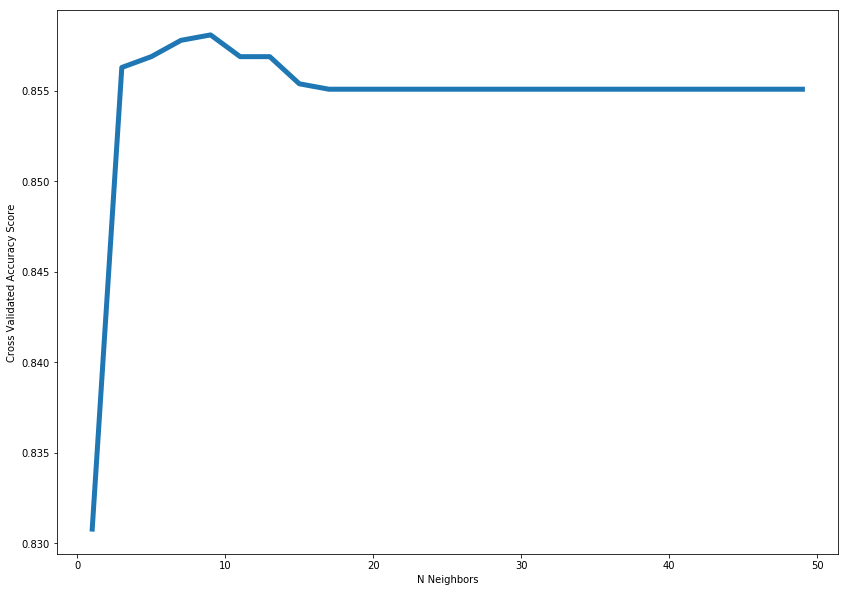

In [196]:
#Initialize neighbors list
neighbors = range(1, 51, 2)
#Intialize list with cross validated scores
cv_scores = []

for i in neighbors:
    #Fit model with i
    model = KNeighborsClassifier(n_neighbors=i)
    cv_score = cross_val_score(model, X_ss, y, cv =10 , scoring="accuracy").mean()
    #Append cv_score to cv_scores
    cv_scores.append(cv_score)
    
    
#Plot line plot of neighbors vs cv_scores
plt.figure(figsize=(14, 10))
plt.plot(neighbors, cv_scores, linewidth = 5)
plt.xlabel("N Neighbors")
plt.ylabel("Cross Validated Accuracy Score")
plt.show()

### 10. Imputing with KNN

K-Nearest Neighbors can be used to impute missing values in datasets. What we will do is estimate the most likely value for the missing data based on a KNN model.

We have two columns with missing data:
- `vmail_plan`
- `vmail_message`

**10.A Create two subsets of the churn dataset: one without missing values for `vmail_plan` and `vmail_message`, and one with the missing values.**

First we will impute values for `vmail_plan`. This is a categorical column and so we will impute using classification (predicting whether the plan is yes or no, 1 vs. 0).

**10.B Create a target that is `vmail_plan` and predictor matrix that is all columns except `state`, `area_code`, `churn`, `vmail_plan`, and `vmail_message`.**

> **Note:** We don't include the `churn` variable in the model to impute. Why? We are imputing these missing values so that we can use the rows to predict churn with more data afterwards. If we imputed with churn as a predictor then we would be cheating.

**10.C Standardize the predictor matrix.**

**10.D Find the best K for predicting `vmail_plan`.**

You may want to write a function for this. What is the accuracy for predicting `vmail_plan` at the best K? What is the baseline accuracy for `vmail_plan`?

**10.E Fit a `KNeighborsClassifier` with the best number of neighbors.**

**10.F Predict the missing `vmail_plan` values using the subset of the data where it is misssing.**

You will need to:
1. Create a new predictor matrix using the same predictors but from the missing subset of data.
- Standardize this predictor matrix *using the StandardScaler object fit on the non-missing data*. This means you will just use the `.transform()` function. It is important to standardize the new predictors the same way we standardized the original predictors if we want the predictions to make sense. Calling `.fit_transform()` will reset the standardized scale.
- Predict what the missing vmail plan values should be.
- Replace the missing values in the original with the predicted values.

> **Note:** It may predict all 0's. This is OK. If you want to see the predicted probabilities of `vmail_plan` for each row you can use the `.predict_proba()` function instead of `.predict()`.  You can use these probabilities to manually set the criteria threshold.

### 11. Impute the missing values for `vmail_message` using the same process.

Since `vmail_message` is essentially a continuous measure, you need to use `KNeighborsRegressor` instead of the `KNeighborsClassifier`.

KNN can do both regression and classification! Instead of "voting" on the class like in classification, the neighbors will average their value for the target in regression.

### 12. Given the accuracy (and $R^2$) of your best imputation models when finding the best K neighbors, do you think imputing is a good idea?

### 13. With the imputed dataset, cross-validate the accuracy predicting churn. Is it better? Worse? The same?